In [162]:
pip install seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


In [163]:
pip install --upgrade pip --quiet

Note: you may need to restart the kernel to use updated packages.


# 0.0 Importing the Requirements

In [164]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Exploration (EDA)
* Load the dataset and display the first few rows.
* Get summary statistics (mean, median, standard deviation, etc.).
* Check for missing values and handle them appropriately.
Identify and handle outliers.


### 1.1 Loading the data and displaying the head.

In [165]:
sales_data = pd.read_csv(r'Sales_Data.csv')
sales_data.head()

,Date,Region,Product Category,Units Sold,Revenue,Profit Margin (%),Customer Type
0,2023-04-13,East,Electronics,18,761,9.82,New
1,2023-12-15,South,Toys,25,4744,24.52,Returning
2,2023-09-28,North,Clothing,12,411,21.03,Returning
3,2023-04-17,West,Clothing,15,3020,24.19,Returning
4,2023-03-13,West,Electronics,26,1182,14.76,New


In [166]:
# Sort the sales_data DataFrame by the 'Date' column
sales_data = sales_data.sort_values(by='Date')

# Display the sorted DataFrame
sales_data.head()

,Date,Region,Product Category,Units Sold,Revenue,Profit Margin (%),Customer Type
446,2023-01-01,South,Clothing,15,945,12.61,New
263,2023-01-02,East,Toys,19,135,11.95,New
206,2023-01-02,South,Clothing,13,2989,20.71,Returning
63,2023-01-02,West,Groceries,44,3255,10.91,New
496,2023-01-04,North,Groceries,18,2808,7.30,New


### 1.2 Summary Statistics

In [167]:
sales_data.describe()

,Units Sold,Revenue,Profit Margin (%)
count,500.000000,500.000000,500.00000
mean,25.158000,2565.624000,15.19228
std,13.812698,1413.019626,5.78963
min,1.000000,101.000000,5.06000
25%,13.000000,1347.500000,10.12000
50%,25.000000,2598.500000,15.47000
75%,37.000000,3816.750000,20.29500
max,49.000000,4995.000000,24.97000


### 1.3 Checking for Missing values

In [168]:
sales_data.isnull().sum()

Date                 0
Region               0
Product Category     0
Units Sold           0
Revenue              0
Profit Margin (%)    0
Customer Type        0
dtype: int64

In [169]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data.head()

,Date,Region,Product Category,Units Sold,Revenue,Profit Margin (%),Customer Type
446,2023-01-01,South,Clothing,15,945,12.61,New
263,2023-01-02,East,Toys,19,135,11.95,New
206,2023-01-02,South,Clothing,13,2989,20.71,Returning
63,2023-01-02,West,Groceries,44,3255,10.91,New
496,2023-01-04,North,Groceries,18,2808,7.30,New


In [170]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 446 to 419
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               500 non-null    datetime64[ns]
 1   Region             500 non-null    object        
 2   Product Category   500 non-null    object        
 3   Units Sold         500 non-null    int64         
 4   Revenue            500 non-null    int64         
 5   Profit Margin (%)  500 non-null    float64       
 6   Customer Type      500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 31.2+ KB


### 1.4 Detecting Outliers

In [171]:
sales_data['Date'] = pd.to_datetime(sales_data['Date']).dt.strftime('%Y-%B-%d')
sales_data.head()

,Date,Region,Product Category,Units Sold,Revenue,Profit Margin (%),Customer Type
446,2023-January-01,South,Clothing,15,945,12.61,New
263,2023-January-02,East,Toys,19,135,11.95,New
206,2023-January-02,South,Clothing,13,2989,20.71,Returning
63,2023-January-02,West,Groceries,44,3255,10.91,New
496,2023-January-04,North,Groceries,18,2808,7.30,New


In [172]:
sales_data['Month'] = pd.to_datetime(sales_data['Date']).dt.strftime('%B')
sales_data.head()

,Date,Region,Product Category,Units Sold,Revenue,Profit Margin (%),Customer Type,Month
446,2023-January-01,South,Clothing,15,945,12.61,New,January
263,2023-January-02,East,Toys,19,135,11.95,New,January
206,2023-January-02,South,Clothing,13,2989,20.71,Returning,January
63,2023-January-02,West,Groceries,44,3255,10.91,New,January
496,2023-January-04,North,Groceries,18,2808,7.30,New,January


In [173]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format = '%Y-%B-%d')
sales_data.head()

,Date,Region,Product Category,Units Sold,Revenue,Profit Margin (%),Customer Type,Month
446,2023-01-01,South,Clothing,15,945,12.61,New,January
263,2023-01-02,East,Toys,19,135,11.95,New,January
206,2023-01-02,South,Clothing,13,2989,20.71,Returning,January
63,2023-01-02,West,Groceries,44,3255,10.91,New,January
496,2023-01-04,North,Groceries,18,2808,7.30,New,January


In [174]:
numerical_data = sales_data.select_dtypes(include=[np.number])
numerical_data.head()

,Units Sold,Revenue,Profit Margin (%)
446,15,945,12.61
263,19,135,11.95
206,13,2989,20.71
63,44,3255,10.91
496,18,2808,7.30


#### Detecting outliers Using Interquartile Range (IQR) Method

In [175]:
Q1 = numerical_data.quantile(0.25)  
Q3 = numerical_data.quantile(0.75)

IQR = Q3 - Q1
print("The Interquartile Range for Each Numeric Column: \n\n", IQR)

outliers = (numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))

print("\n Outliers detected using IQR method:\n")
print(outliers.value_counts(), "\n")
print(outliers.sum())
#print(outliers)


#print(numerical_data[~outliers])

The Interquartile Range for Each Numeric Column: 

 Units Sold             24.000
Revenue              2469.250
Profit Margin (%)      10.175
dtype: float64

 Outliers detected using IQR method:

Units Sold  Revenue  Profit Margin (%)
False       False    False                500
Name: count, dtype: int64 

Units Sold           0
Revenue              0
Profit Margin (%)    0
dtype: int64


#### Detecting outliers Using Z-score Method


In [176]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(numerical_data[['Units Sold', 'Revenue', 'Profit Margin (%)']]))

print("Z-scores for each data point: \n\n", z_scores)

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Print outliers
print("\n Outliers detected using Z-score method:\n")
print(numerical_data[['Units Sold', 'Revenue', 'Profit Margin (%)']].iloc[outliers[0]])

Z-scores for each data point: 

 [[0.7361468  1.14807114 0.44646486]
 [0.44626817 1.72188569 0.56057595]
 [0.88108612 0.29992507 0.95398952]
 ...
 [0.42336775 1.60553027 1.24351358]
 [0.27842843 1.02038111 0.95744744]
 [0.49583741 1.65246122 1.15706578]]

 Outliers detected using Z-score method:

Empty DataFrame
Columns: [Units Sold, Revenue, Profit Margin (%)]
Index: []


#### Detecting outliers Using Box and Whisker Diargram

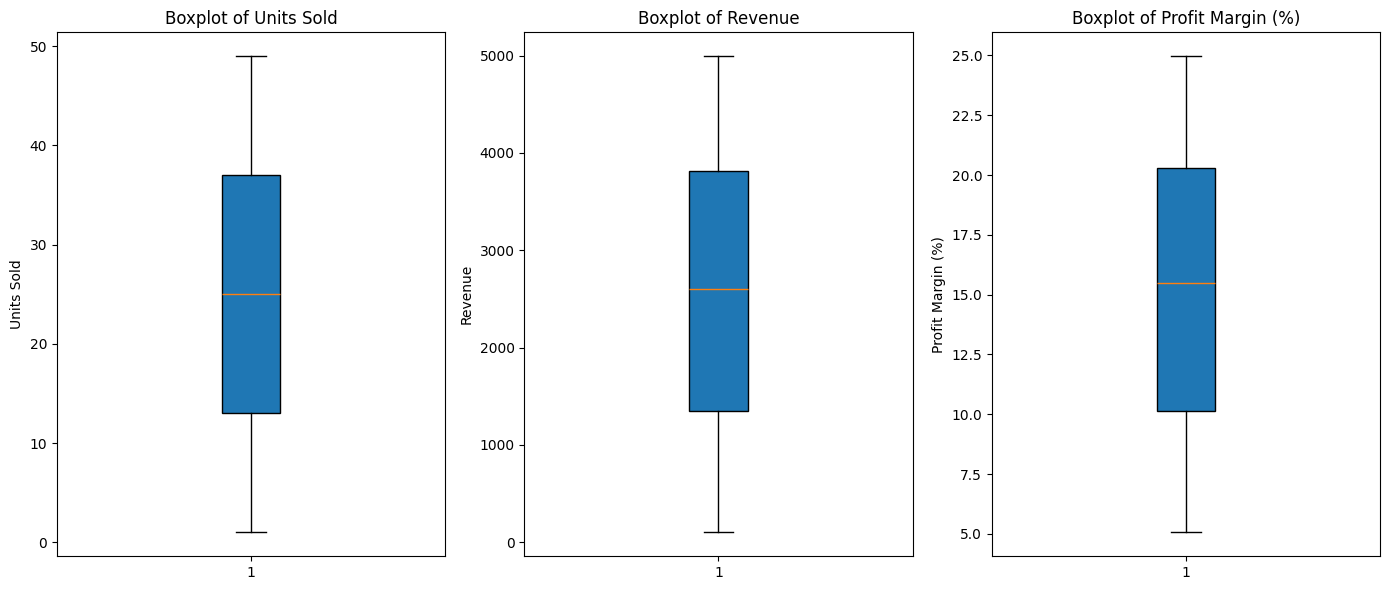

In [177]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 3, figsize=(14, 6))  

#Units Sold  Revenue  Profit Margin (%)

# Plot the histogram in the first subplot (axes[0])
axes[0].boxplot(numerical_data['Units Sold'], patch_artist=True)
axes[0].set_ylabel('Units Sold')
axes[0].set_title('Boxplot of Units Sold')

# Plot the boxplot in the second subplot (axes[1])
axes[1].boxplot(numerical_data['Revenue'], patch_artist=True)
axes[1].set_ylabel('Revenue')
axes[1].set_title('Boxplot of Revenue')

# Plot the boxplot in the third subplot (axes[2])
axes[2].boxplot(numerical_data['Profit Margin (%)'], patch_artist=True)
axes[2].set_ylabel('Profit Margin (%)')
axes[2].set_title('Boxplot of Profit Margin (%)')

# Improve layout
plt.tight_layout()
plt.show()

# 2. Univariate and Multivariate Analysis
* Generate histograms and boxplots for numerical variables.
* Create bar charts to visualize the distribution of categorical variables.
* Use correlation matrices to analyze relationships between numerical variables.


### 2.1 Univariate Histograms and Boxplots for Numeric Variables

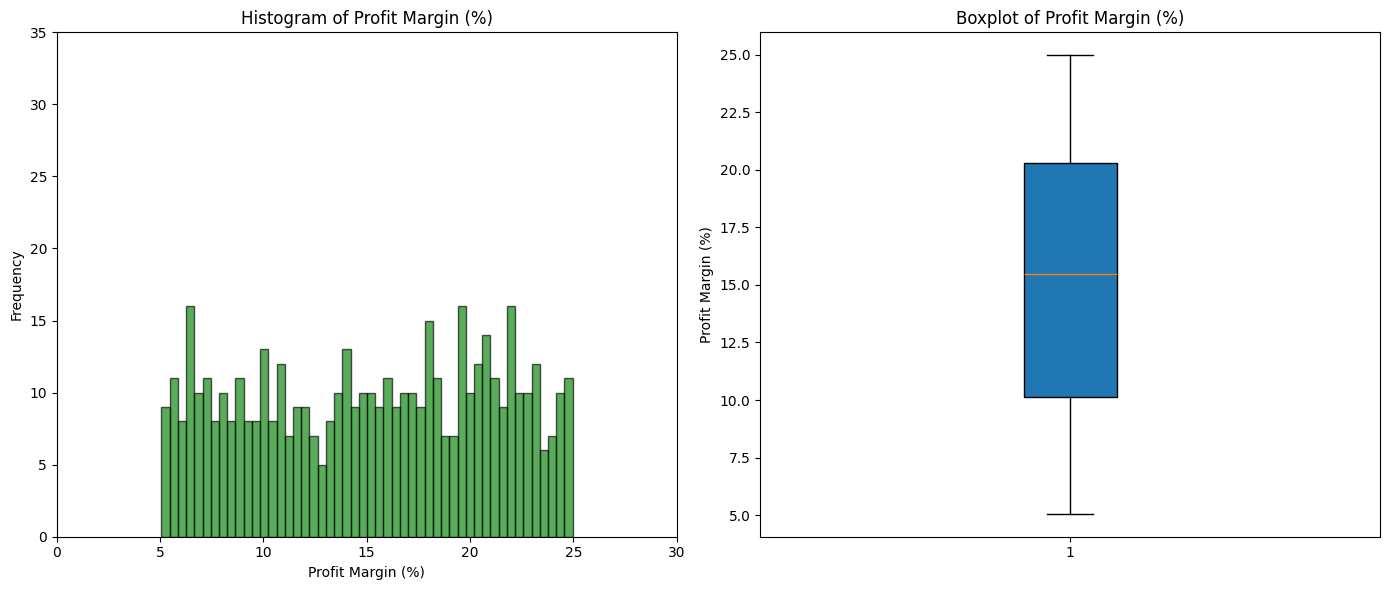

In [178]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

# Plot the histogram in the first subplot (axes[0])
axes[0].hist(numerical_data['Profit Margin (%)'], bins=50, color='green', edgecolor='black', alpha=0.65)
axes[0].set_xlabel('Profit Margin (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Profit Margin (%)')
axes[0].set_xlim(0, 30)
axes[0].set_ylim(0, 35)

# Plot the boxplot in the second subplot (axes[1])
axes[1].boxplot(numerical_data['Profit Margin (%)'], patch_artist=True)
axes[1].set_ylabel('Profit Margin (%)')
axes[1].set_title('Boxplot of Profit Margin (%)')

# Improve layout
plt.tight_layout()

plt.show()

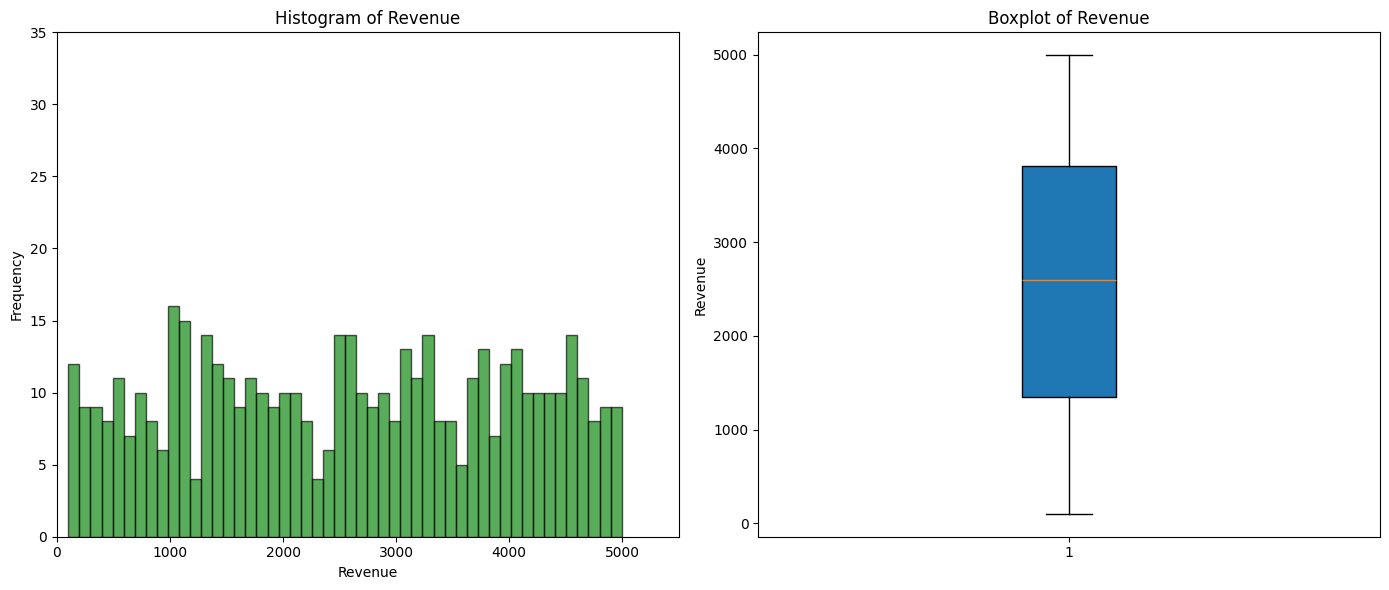

In [179]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Adjust figsize as needed

# Plot the histogram in the first subplot (axes[0])
axes[0].hist(numerical_data['Revenue'], bins=50, color='green', edgecolor='black', alpha=0.65)
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Revenue')
axes[0].set_xlim(0, 5500)
axes[0].set_ylim(0, 35)

# Plot the boxplot in the second subplot (axes[1])
axes[1].boxplot(numerical_data['Revenue'], patch_artist=True)
axes[1].set_ylabel('Revenue')
axes[1].set_title('Boxplot of Revenue')

# Improve layout
plt.tight_layout()

# Show the combined plot
plt.show()

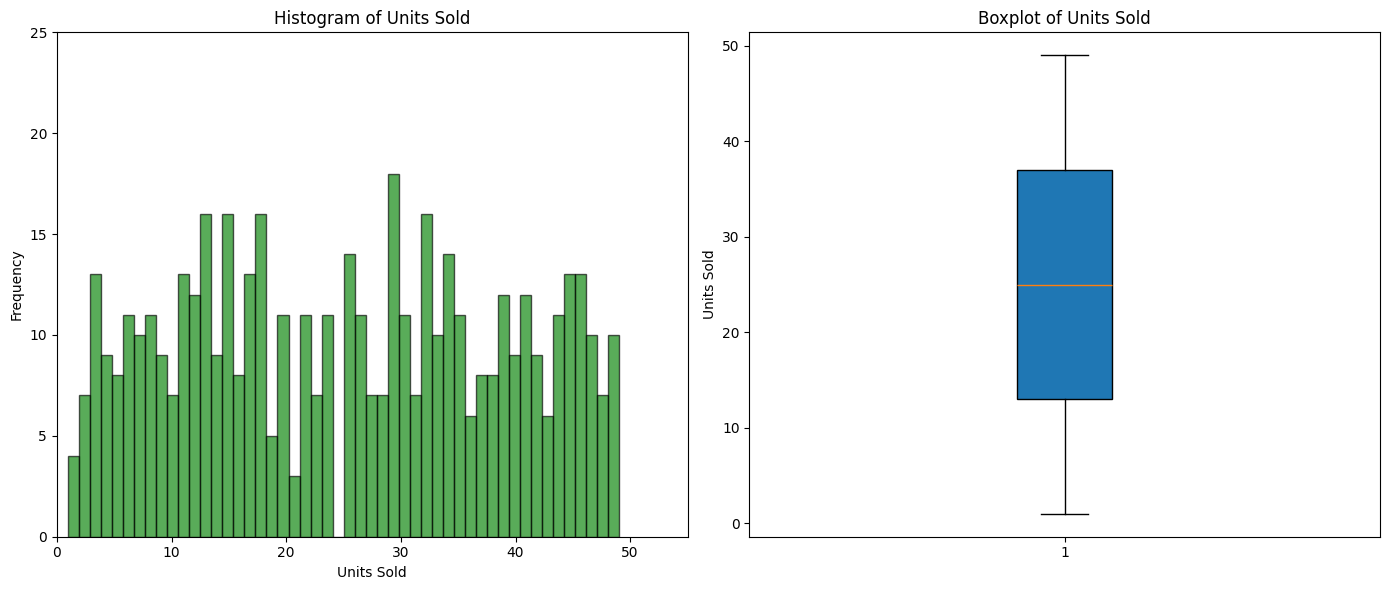

In [180]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Adjust figsize as needed

# Plot the histogram in the first subplot (axes[0])
axes[0].hist(numerical_data['Units Sold'], bins=50, color='green', edgecolor='black', alpha=0.65)
axes[0].set_xlabel('Units Sold')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Units Sold')
axes[0].set_xlim(0, 55)
axes[0].set_ylim(0, 25)

# Plot the boxplot in the second subplot (axes[1])
axes[1].boxplot(numerical_data['Units Sold'], patch_artist=True)
axes[1].set_ylabel('Units Sold')
axes[1].set_title('Boxplot of Units Sold')

# Improve layout
plt.tight_layout()

# Show the combined plot
plt.show()

### 2.2 Multivariate Diagrams for Categorical and Numeric Variables.

#### 1. Region-Based Analysis

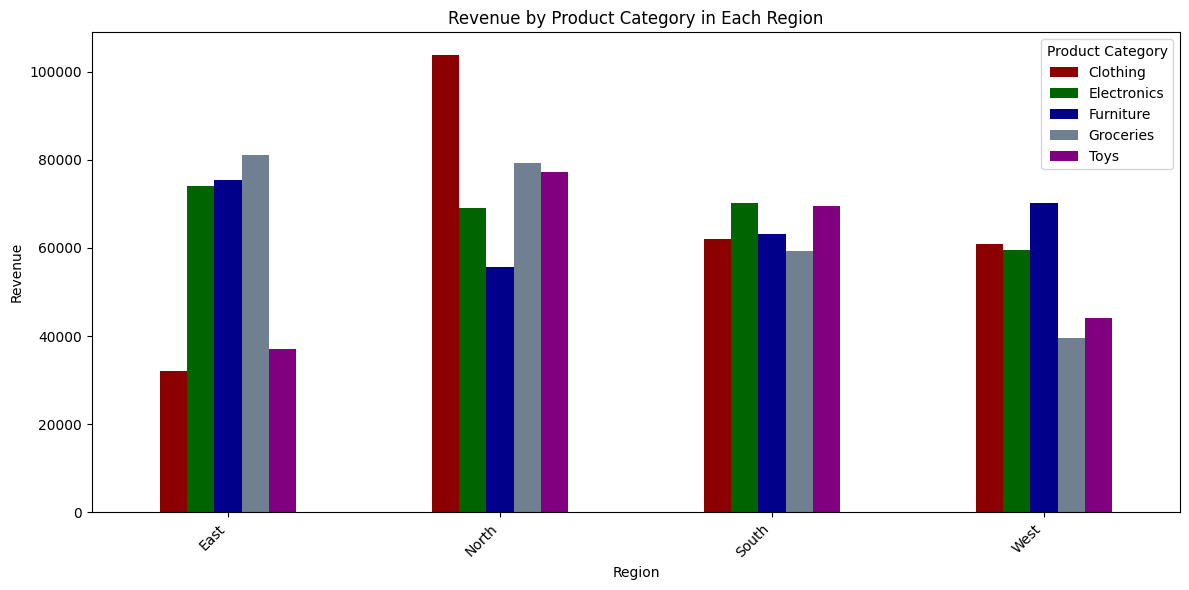

In [181]:
# 2. Pivot the data for easier visualization
grouped_data = sales_data.groupby(['Region', 'Product Category'])['Revenue'].sum().reset_index()
pivot_table = grouped_data.pivot(index='Region', columns='Product Category', values='Revenue').fillna(0)

# 3. Create a grouped bar chart
pivot_table.plot(kind='bar', figsize=(12, 6), color = ['darkred', 'darkgreen', 'darkblue', 'slategray', 'purple'])
plt.title('Revenue by Product Category in Each Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1.1 Region vs. Units Sold

* Examine if sales volume varies across different regions.
* This helps identify strong and weak markets.

##### 1.2 Region vs. Revenue

* Analyze which regions generate the most income.
* This helps prioritize regional strategies.

##### 1.3 Region vs. Profit Margin (%)

* Assess profitability differences across regions.
* This helps identify regions with higher operational efficiency or pricing power.

##### 1.4 Region vs. Customer Type

* Determine if customer demographics differ significantly by region.
* This helps tailor regional marketing campaigns

In [182]:
sales_data.columns

Index(['Date', 'Region', 'Product Category', 'Units Sold', 'Revenue',
       'Profit Margin (%)', 'Customer Type', 'Month'],
      dtype='object')

#### 2. Product Category Analysis

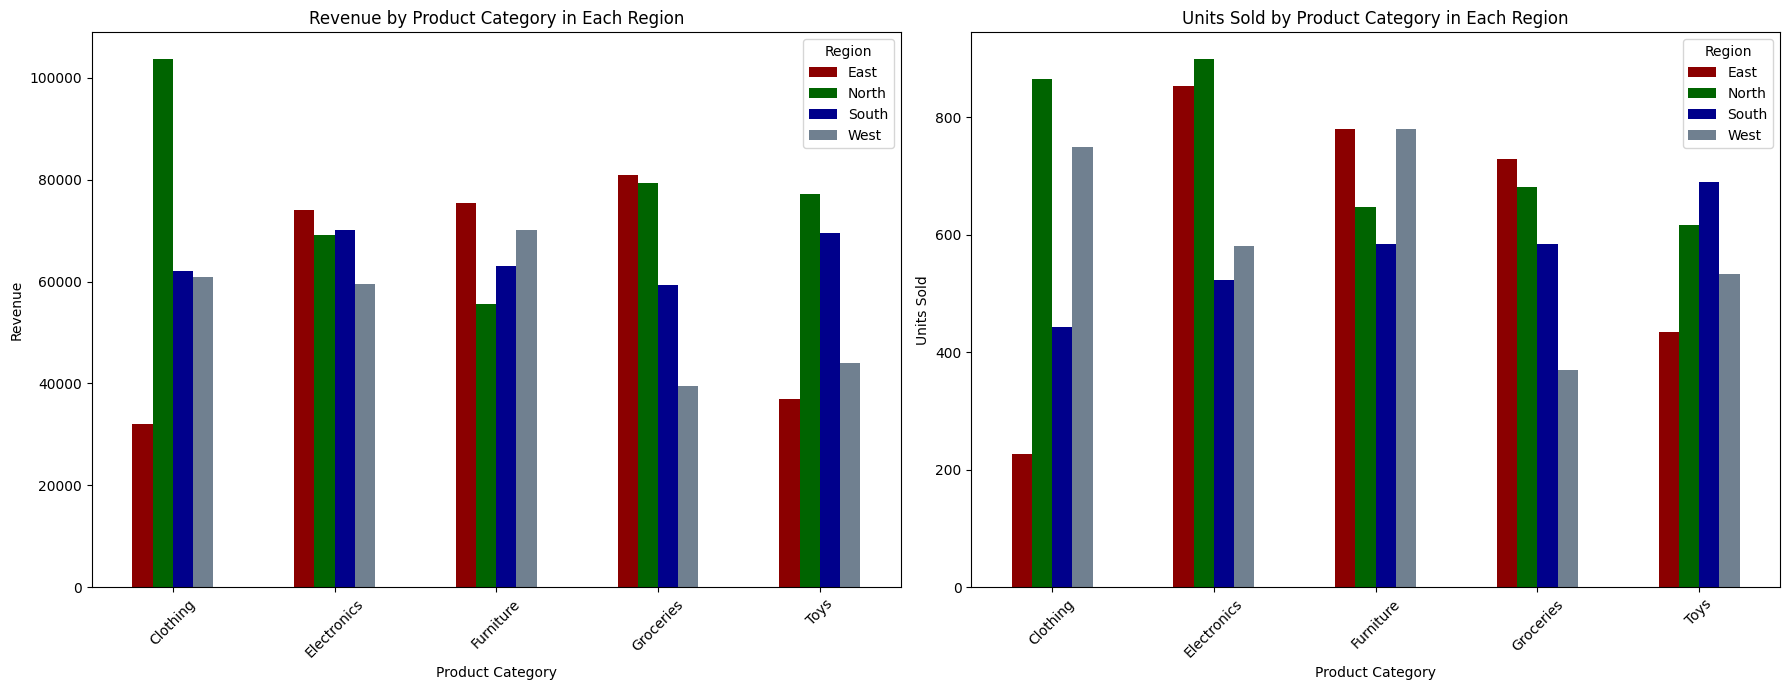

In [183]:
# --- Revenue Plot ---
grouped_revenue = sales_data.groupby(['Region', 'Product Category'])['Revenue'].sum().reset_index()
pivot_revenue = grouped_revenue.pivot(index='Product Category', columns='Region', values='Revenue').fillna(0)

# --- Units Sold Plot ---
grouped_units = sales_data.groupby(['Region', 'Product Category'])['Units Sold'].sum().reset_index()
pivot_units = grouped_units.pivot(index='Product Category', columns='Region', values='Units Sold').fillna(0)

# --- Combine Plots ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))  # 1 row, 2 columns

# Revenue Plot
pivot_revenue.plot(kind='bar', ax=axes[0], color = ['darkred', 'darkgreen', 'darkblue', 'slategray', 'purple'])
axes[0].set_title('Revenue by Product Category in Each Region')
axes[0].set_xlabel('Product Category')
axes[0].set_ylabel('Revenue')
axes[0].tick_params(axis='x', rotation=45)

# Units Sold Plot
pivot_units.plot(kind='bar', ax=axes[1], color = ['darkred', 'darkgreen', 'darkblue', 'slategray', 'purple'])
axes[1].set_title('Units Sold by Product Category in Each Region')
axes[1].set_xlabel('Product Category')
axes[1].set_ylabel('Units Sold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

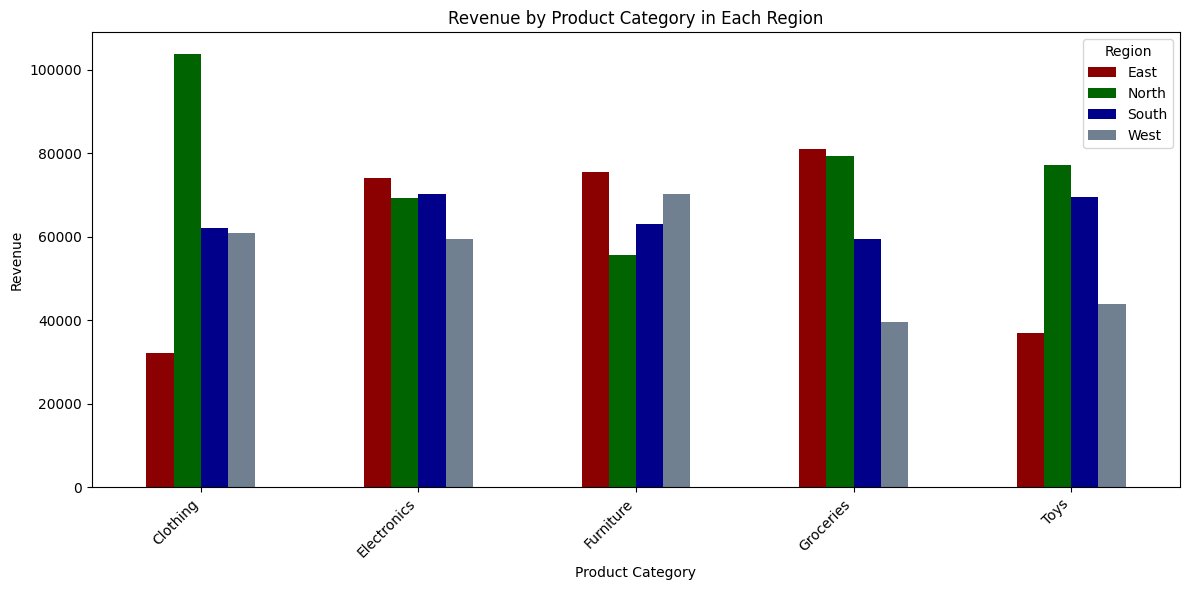

In [184]:

#Customer Type, Product Category, and Profit Margin

# 2. Pivot the data for easier visualization
grouped_data = sales_data.groupby(['Region', 'Product Category'])['Revenue'].sum().reset_index()
pivot_table = grouped_data.pivot(index='Product Category', columns='Region', values='Revenue').fillna(0)

# 3. Create a grouped bar chart
pivot_table.plot(kind='bar', figsize=(12, 6), color = ['darkred', 'darkgreen', 'darkblue', 'slategray'])
plt.title('Revenue by Product Category in Each Region')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 3. Customer Type Analysis

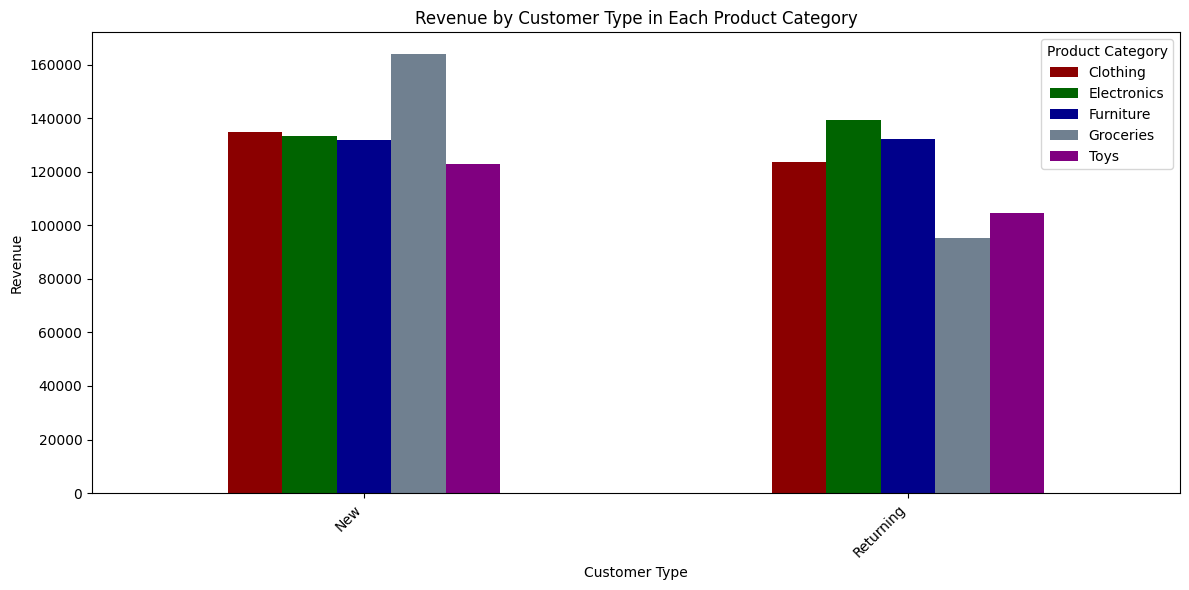

In [185]:
#Customer Type, Product Category, and Profit Margin

# 2. Pivot the data for easier visualization
grouped_data = sales_data.groupby(['Customer Type', 'Product Category'])['Revenue'].sum().reset_index()
pivot_table = grouped_data.pivot(index='Customer Type', columns='Product Category', values='Revenue').fillna(0)

# 3. Create a grouped bar chart
pivot_table.plot(kind='bar', figsize=(12, 6), color = ['darkred', 'darkgreen', 'darkblue', 'slategray', 'purple'])
plt.title('Revenue by Customer Type in Each Product Category')
plt.xlabel('Customer Type')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 4. Performance and Profitability Analysis

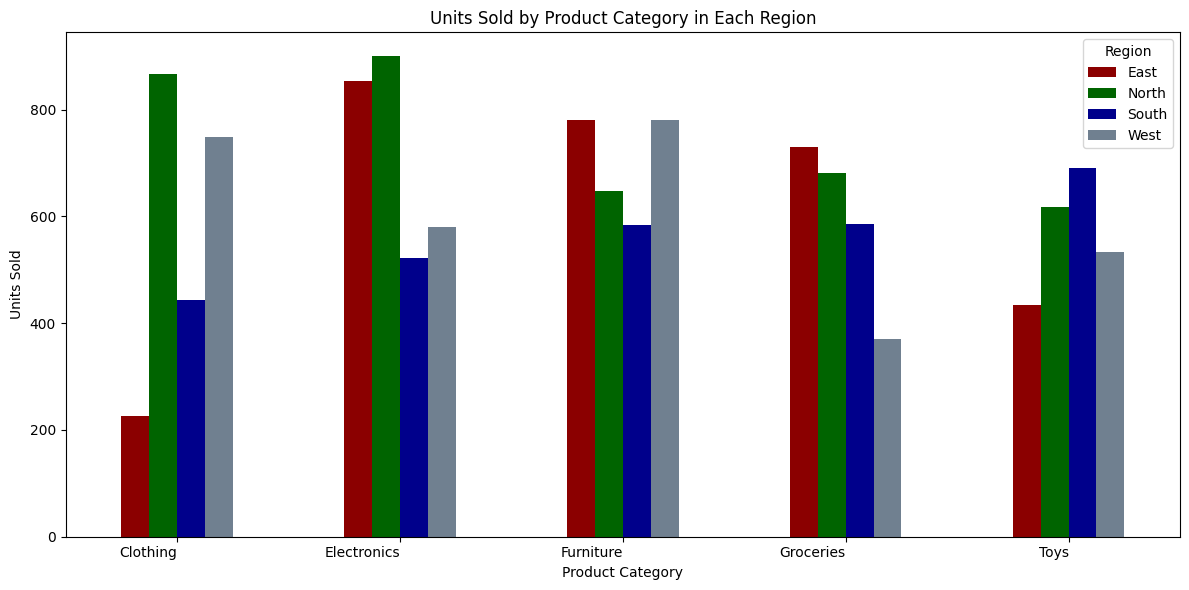

In [186]:

#Customer Type, Product Category, and Profit Margin

# 2. Pivot the data for easier visualization
grouped_data = sales_data.groupby(['Region', 'Product Category'])['Units Sold'].sum().reset_index()
pivot_table = grouped_data.pivot(index='Product Category', columns='Region', values='Units Sold').fillna(0)

# 3. Create a grouped bar chart
pivot_table.plot(kind='bar', figsize=(12, 6), color = ['darkred', 'darkgreen', 'darkblue', 'slategray'])
plt.title('Units Sold by Product Category in Each Region')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

##### 4.1 Units Sold vs. Revenue:
* Examine the relationship between sales volume and revenue.
* This helps assess pricing strategies and sales effectiveness.
##### 4.2 Revenue vs. Profit Margin (%):
* Analyze how revenue impacts profitability.
* This helps optimize pricing and cost structures.
##### 4.3 Units Sold vs. Profit Margin (%)
* See if higher sales volume relates to higher or lower profit margins.
* This can indicate economies of scale, or price reductions due to bulk sales.

### 2.3 Correlation Matrix

In [187]:
corr_mat_hep = numerical_data.corr().round(2)
corr_mat_hep

,Units Sold,Revenue,Profit Margin (%)
Units Sold,1.00,0.08,-0.01
Revenue,0.08,1.00,-0.02
Profit Margin (%),-0.01,-0.02,1.00


<Axes: >

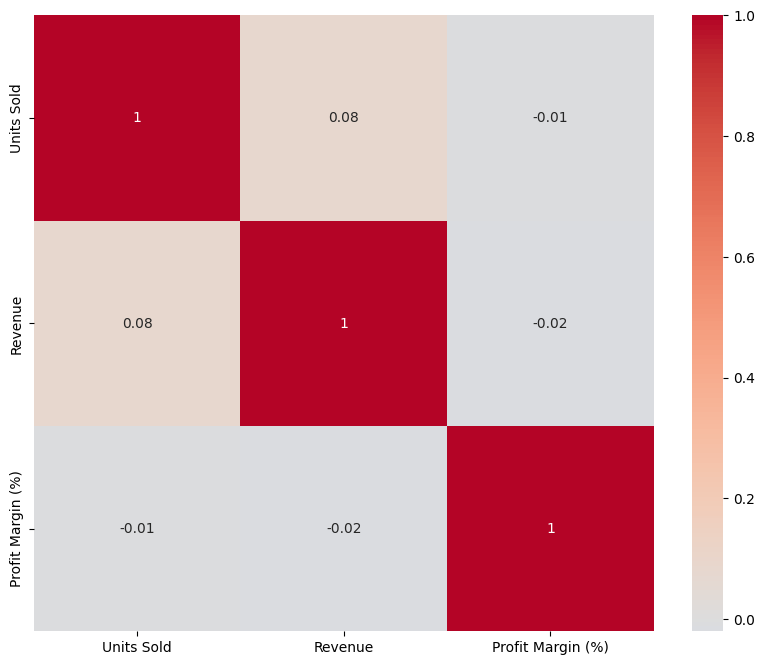

In [188]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat_hep, annot=True, cmap='coolwarm', center=0)

# 3. Data Visualization
* Create line charts to show sales trends over time.
* Use scatter plots to analyze revenue vs. profit margin.
* Generate heatmaps to identify high-performing regions.
* Build bar plots showing product category performance across different regions.


### 3.1 Line Charts to present Sales trends over time

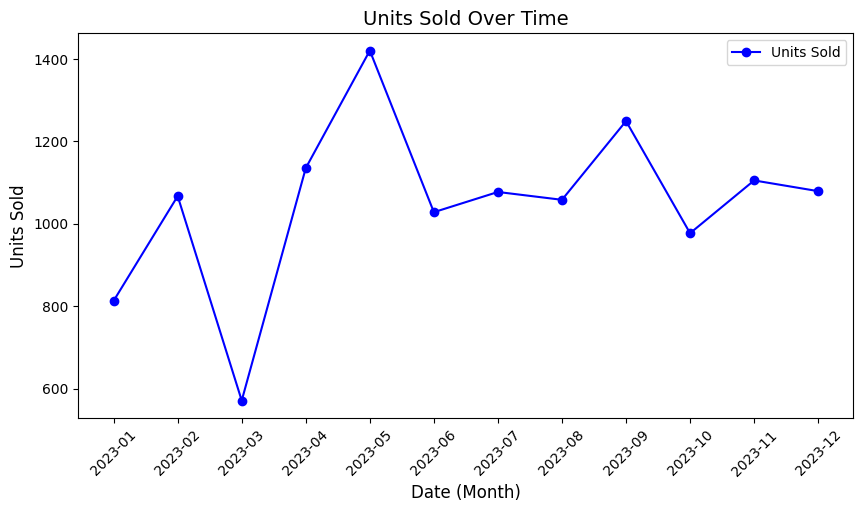

In [189]:
# Convert "Date" column to datetime format
sales_data["Date"] = pd.to_datetime(sales_data["Date"], errors='coerce')

# Drop rows where the conversion failed (if any)
df = sales_data.dropna(subset=["Date"])

# Aggregate sales data by month
df_monthly_sales = sales_data.groupby(sales_data["Date"].dt.to_period("M")).sum(numeric_only=True)

# Create the line plot
plt.figure(figsize=(10, 5))
plt.plot(df_monthly_sales.index.astype(str), df_monthly_sales["Units Sold"], marker="o", linestyle="-", color="blue", label="Units Sold")

# Title and labels
plt.title('Units Sold Over Time', fontsize=14)
plt.xlabel('Date (Month)', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Add legend

# Show the plot
plt.show()


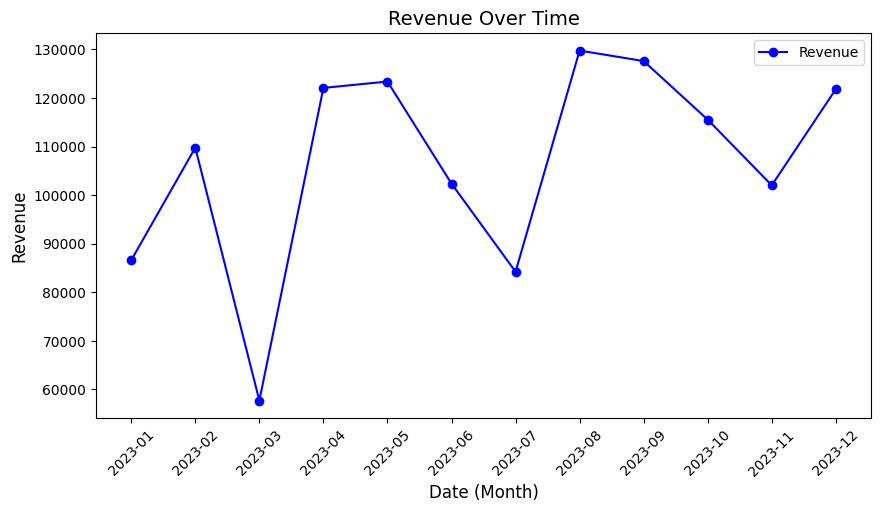

In [190]:
# Convert "Date" column to datetime format
sales_data["Date"] = pd.to_datetime(sales_data["Date"], errors='coerce')

# Drop rows where the conversion failed (if any)
df = sales_data.dropna(subset=["Date"])

# Aggregate sales data by month
df_monthly_sales = sales_data.groupby(sales_data["Date"].dt.to_period("M")).sum(numeric_only=True)

# Create the line plot
plt.figure(figsize=(10, 5))
plt.plot(df_monthly_sales.index.astype(str), df_monthly_sales["Revenue"], marker="o", linestyle="-", color="blue", label="Revenue")

# Title and labels
plt.title('Revenue Over Time', fontsize=14)
plt.xlabel('Date (Month)', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Add legend

# Show the plot
plt.show()

In [191]:
sales_data.columns

Index(['Date', 'Region', 'Product Category', 'Units Sold', 'Revenue',
       'Profit Margin (%)', 'Customer Type', 'Month'],
      dtype='object')

In [ ]:
# Convert "Date" column to datetime format
sales_data["Date"] = pd.to_datetime(sales_data["Date"], errors='coerce')

# Drop rows where the conversion failed (if any)
df = sales_data.dropna(subset=["Date"])

# Aggregate sales data by month
df_monthly_profit_margin = sales_data.groupby(sales_data["Profit Margin (%)"].mean())

# Create the line plot
plt.figure(figsize=(10, 5))
plt.plot(df_monthly_sales.index.astype(str), df_monthly_sales["Profit Margin (%)"], marker="o", linestyle="-", color="blue", label="Profit Margin (%)")

# Title and labels
plt.title('Profit Margin (%) Over Time', fontsize=14)
plt.xlabel('Date (Month)', fontsize=12)
plt.ylabel('Profit Margin (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Add legend

# Show the plot
plt.show()

### 3.2 Scatter Plots

In [193]:
numerical_data.columns

Index(['Units Sold', 'Revenue', 'Profit Margin (%)'], dtype='object')

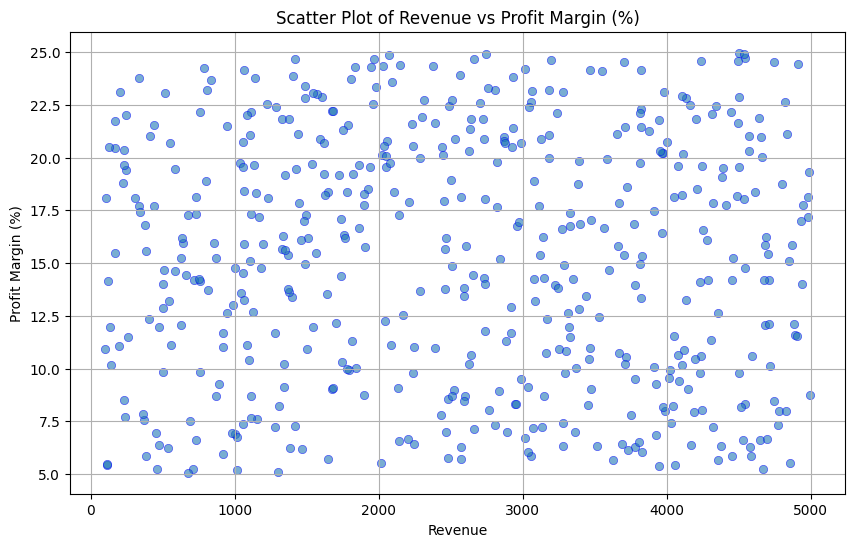

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(sales_data['Revenue'], sales_data['Profit Margin (%)'], alpha=0.6, edgecolors='blue', linewidth=0.5)
plt.title('Scatter Plot of Revenue vs Profit Margin (%)')
plt.xlabel('Revenue')
plt.ylabel('Profit Margin (%)')
plt.grid(False)



### 3.3 Heatmaps to identify high-performing regions.

In [195]:
grouped_revenue = sales_data.groupby(['Region'])['Revenue'].sum().reset_index()
grouped_units = sales_data.groupby(['Region'])['Units Sold'].sum().reset_index()
grouped_per_margin = sales_data.groupby(['Region'])['Profit Margin (%)'].mean().reset_index()

#merged_data = pd.merge(grouped_revenue, grouped_units, grouped_per_margin, on='Region')
#merged_data

In [196]:
merged_data = pd.merge(grouped_revenue, grouped_units, on='Region')
merged_data = pd.merge(merged_data, grouped_per_margin, on='Region')

merged_data

,Region,Revenue,Units Sold,Profit Margin (%)
0,East,299543,3026,15.002119
1,North,385042,3713,15.652980
2,South,324274,2826,15.113879
3,West,273953,3014,14.861565


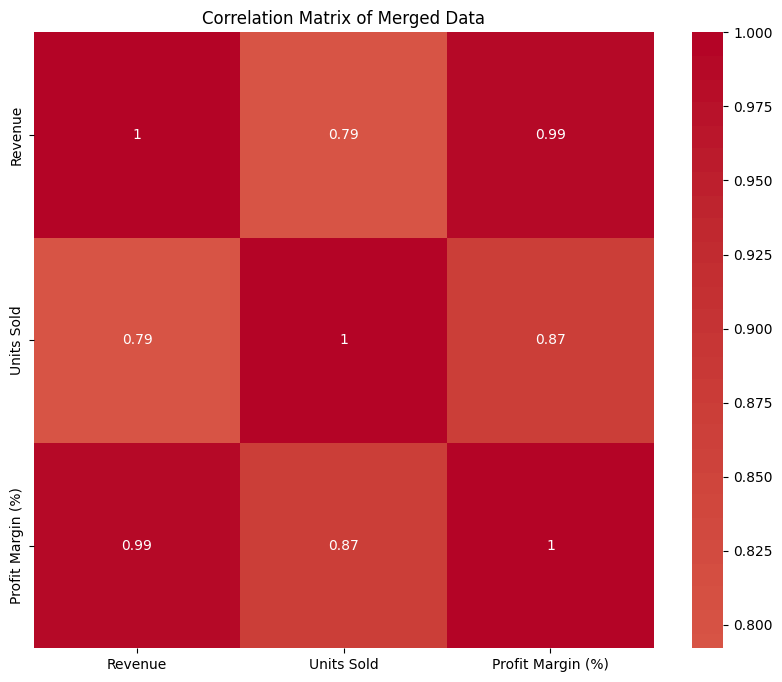

In [197]:
# Calculate the correlation matrix
corr_matrix = merged_data.select_dtypes(include=[np.number]).corr()


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Merged Data')
plt.show()

In [198]:
grouped_units

,Region,Units Sold
0,East,3026
1,North,3713
2,South,2826
3,West,3014


### 3.4 Bar plots showing Product Category performance across different regions.

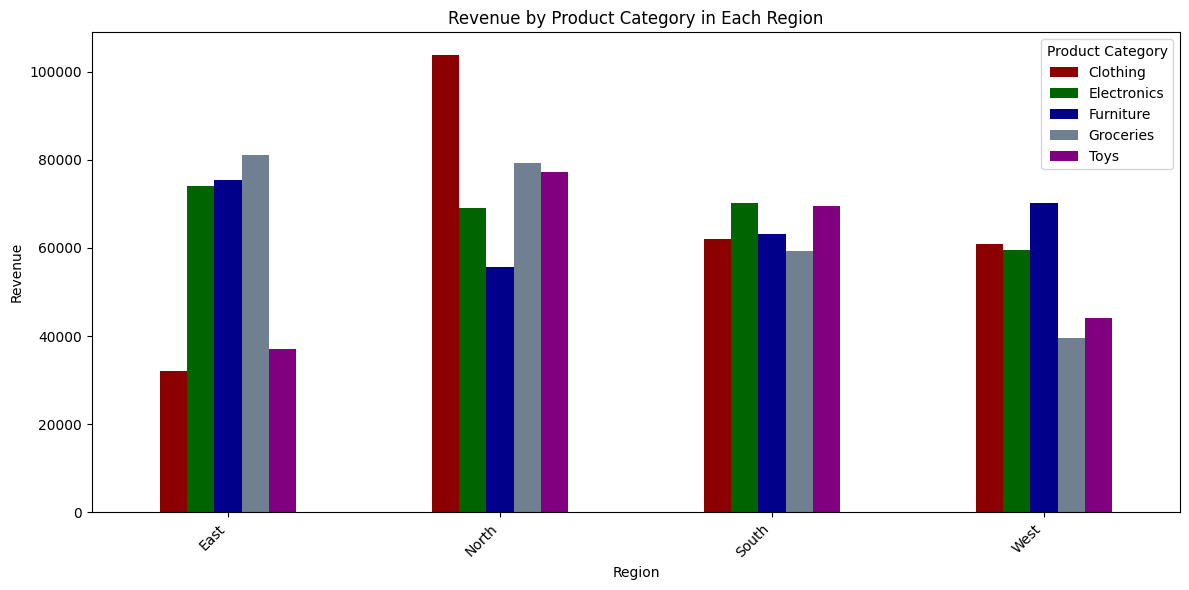

In [199]:
# 2. Pivot the data for easier visualization
grouped_data = sales_data.groupby(['Region', 'Product Category'])['Revenue'].sum().reset_index()
pivot_table = grouped_data.pivot(index='Region', columns='Product Category', values='Revenue').fillna(0)

# 3. Create a grouped bar chart
pivot_table.plot(kind='bar', figsize=(12, 6), color = ['darkred', 'darkgreen', 'darkblue', 'slategray', 'purple'])
plt.title('Revenue by Product Category in Each Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

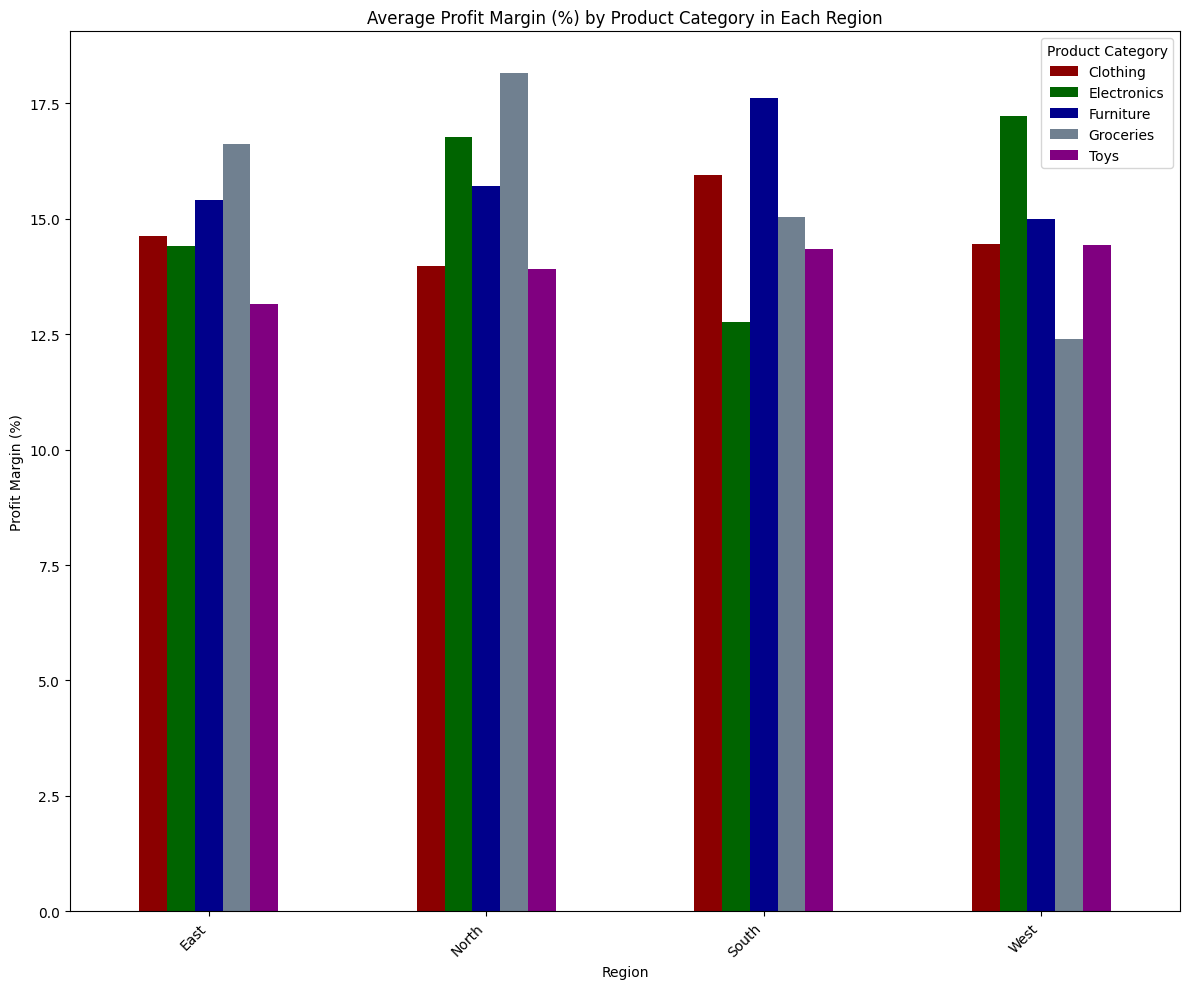

In [200]:
# 2. Pivot the data for easier visualization
grouped_data = sales_data.groupby(['Region', 'Product Category'])['Profit Margin (%)'].mean().reset_index()
pivot_table = grouped_data.pivot(index='Region', columns='Product Category', values='Profit Margin (%)').fillna(0)

# 3. Create a grouped bar chart
pivot_table.plot(kind='bar', figsize=(12, 10), color = ['darkred', 'darkgreen', 'darkblue', 'slategray', 'purple'])
plt.title('Average Profit Margin (%) by Product Category in Each Region')
plt.xlabel('Region')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Insights & Business Recommendations
* Identify the best-performing region based on revenue and profit.
* Find which product category generates the highest revenue.
* Recommend strategies to improve sales in underperforming regions.

The best performing region based on the revenue and profit is the West Region. When calculating the products sold within the region, it has never been less then 600 units. Which puts it as a leading region for all the product and marking the best performing Sales Revenue.
 
Using the univariate analysis method we have found that the Electronics is the best selling and generating high revenue and has the most returning customers within the regions.
 
Within the line simulation, we have determined which product has the highest selling mark and less, which our recommendation for the underperforming products will have to only be sold seasonaly and the month of March should be excluded in the production. These gives us the scope of how many will need to be manufactured and delivered at those regions and calculating the revenue of each weekly.